In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
con = sqlite3.connect('superheroes.db')
df = pd.read_sql('SELECT * FROM superheroes', con)
df

,id,name,eye_color,hair_color,appearance_count,first_appearance,first_appearance_year
0,1,Batman (Bruce Wayne),Blue Eyes,Black Hair,3093.0,"1939, May",1939
1,2,Superman (Clark Kent),Blue Eyes,Black Hair,2496.0,"1986, October",1986
2,3,Green Lantern (Hal Jordan),Brown Eyes,Brown Hair,1565.0,"1959, October",1959
3,4,James Gordon (New Earth),Brown Eyes,White Hair,1316.0,"1987, February",1987
4,5,Richard Grayson (New Earth),Blue Eyes,Black Hair,1237.0,"1940, April",1940
...,...,...,...,...,...,...,...
6890,6891,James Garfield (New Earth),None,None,NaN,None,None
6891,6892,Nadine West (New Earth),None,None,NaN,None,None
6892,6893,Warren Harding (New Earth),None,None,NaN,None,None
6893,6894,William Harrison (New Earth),None,None,NaN,None,None


In [3]:
df = df.drop(['id', 'first_appearance'], axis = 1)
df = df.drop_duplicates()
df = df.dropna()
df

,name,eye_color,hair_color,appearance_count,first_appearance_year
0,Batman (Bruce Wayne),Blue Eyes,Black Hair,3093.0,1939
1,Superman (Clark Kent),Blue Eyes,Black Hair,2496.0,1986
2,Green Lantern (Hal Jordan),Brown Eyes,Brown Hair,1565.0,1959
3,James Gordon (New Earth),Brown Eyes,White Hair,1316.0,1987
4,Richard Grayson (New Earth),Blue Eyes,Black Hair,1237.0,1940
...,...,...,...,...,...
6506,William Magnus (robot) (New Earth),Blue Eyes,Brown Hair,1.0,1963
6508,Boka (New Earth),Hazel Eyes,Black Hair,1.0,1962
6521,Jeffrey Graham (New Earth),Blue Eyes,Blond Hair,1.0,1951
6526,Green Arrow (Oliver Queen),Green Eyes,Blond Hair,1.0,1941


In [4]:
df = df.rename(columns = {'name' : 'Name', 'eye_color' : 'Eye Color',
                'hair_color' : 'Hair Color', 'appearance_count' : 'Appearance Count',
                'first_appearance_year' : 'First Appearance Year'})
df

,Name,Eye Color,Hair Color,Appearance Count,First Appearance Year
0,Batman (Bruce Wayne),Blue Eyes,Black Hair,3093.0,1939
1,Superman (Clark Kent),Blue Eyes,Black Hair,2496.0,1986
2,Green Lantern (Hal Jordan),Brown Eyes,Brown Hair,1565.0,1959
3,James Gordon (New Earth),Brown Eyes,White Hair,1316.0,1987
4,Richard Grayson (New Earth),Blue Eyes,Black Hair,1237.0,1940
...,...,...,...,...,...
6506,William Magnus (robot) (New Earth),Blue Eyes,Brown Hair,1.0,1963
6508,Boka (New Earth),Hazel Eyes,Black Hair,1.0,1962
6521,Jeffrey Graham (New Earth),Blue Eyes,Blond Hair,1.0,1951
6526,Green Arrow (Oliver Queen),Green Eyes,Blond Hair,1.0,1941


In [5]:
df['Name'] = df['Name'].str.split(pat = ('(')).str[0]
df

,Name,Eye Color,Hair Color,Appearance Count,First Appearance Year
0,Batman,Blue Eyes,Black Hair,3093.0,1939
1,Superman,Blue Eyes,Black Hair,2496.0,1986
2,Green Lantern,Brown Eyes,Brown Hair,1565.0,1959
3,James Gordon,Brown Eyes,White Hair,1316.0,1987
4,Richard Grayson,Blue Eyes,Black Hair,1237.0,1940
...,...,...,...,...,...
6506,William Magnus,Blue Eyes,Brown Hair,1.0,1963
6508,Boka,Hazel Eyes,Black Hair,1.0,1962
6521,Jeffrey Graham,Blue Eyes,Blond Hair,1.0,1951
6526,Green Arrow,Green Eyes,Blond Hair,1.0,1941


In [6]:
df = df.astype({'Appearance Count' : 'int'})
df['First Appearance Year'] = pd.to_datetime(df['First Appearance Year'])
df.dtypes

Name                             object
Eye Color                        object
Hair Color                       object
Appearance Count                  int64
First Appearance Year    datetime64[ns]
dtype: object

In [7]:
df

,Name,Eye Color,Hair Color,Appearance Count,First Appearance Year
0,Batman,Blue Eyes,Black Hair,3093,1939-01-01
1,Superman,Blue Eyes,Black Hair,2496,1986-01-01
2,Green Lantern,Brown Eyes,Brown Hair,1565,1959-01-01
3,James Gordon,Brown Eyes,White Hair,1316,1987-01-01
4,Richard Grayson,Blue Eyes,Black Hair,1237,1940-01-01
...,...,...,...,...,...
6506,William Magnus,Blue Eyes,Brown Hair,1,1963-01-01
6508,Boka,Hazel Eyes,Black Hair,1,1962-01-01
6521,Jeffrey Graham,Blue Eyes,Blond Hair,1,1951-01-01
6526,Green Arrow,Green Eyes,Blond Hair,1,1941-01-01


C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_6224\597129417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = eye_counts.index,


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Blue Eyes'),
  Text(1, 0, 'Brown Eyes'),
  Text(2, 0, 'Black Eyes'),
  Text(3, 0, 'Green Eyes'),
  Text(4, 0, 'Red Eyes'),
  Text(5, 0, 'White Eyes'),
  Text(6, 0, 'Yellow Eyes'),
  Text(7, 0, 'Grey Eyes'),
  Text(8, 0, 'Hazel Eyes'),
  Text(9, 0, 'Purple Eyes'),
  Text(10, 0, 'Violet Eyes'),
  Text(11, 0, 'Gold Eyes'),
  Text(12, 0, 'Amber Eyes'),
  Text(13, 0, 'Pink Eyes'),
  Text(14, 0, 'Orange Eyes'),
  Text(15, 0, 'Photocellular Eyes')])

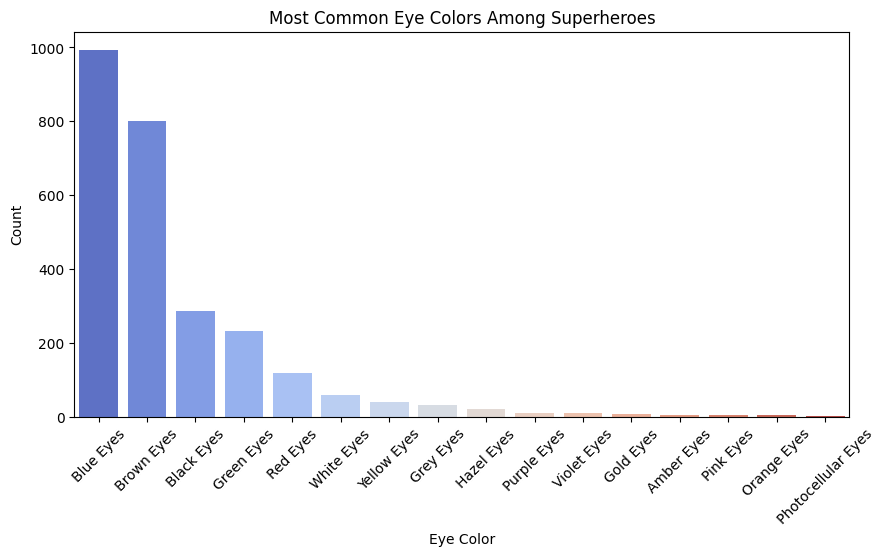

In [8]:
eye_counts = df['Eye Color'].value_counts()

plt.figure(figsize = (10, 5))
sns.barplot(x = eye_counts.index,
            y = eye_counts.values,
            palette = 'coolwarm')
plt.title('Most Common Eye Colors Among Superheroes')
plt.xlabel('Eye Color')
plt.ylabel('Count')
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Hair Color Distribution Among Superheroes')

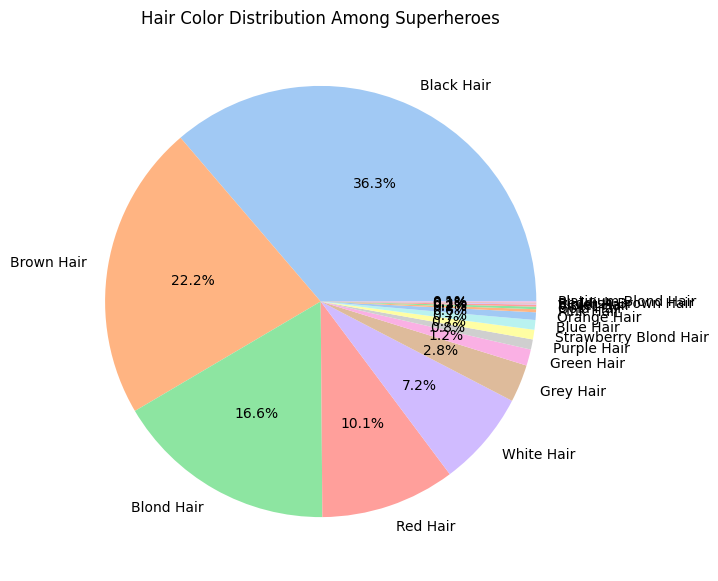

In [9]:
hair_counts = df['Hair Color'].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(hair_counts, labels = hair_counts.index,
        autopct = '%1.1f%%', colors = sns.color_palette('pastel'))
plt.title('Hair Color Distribution Among Superheroes')

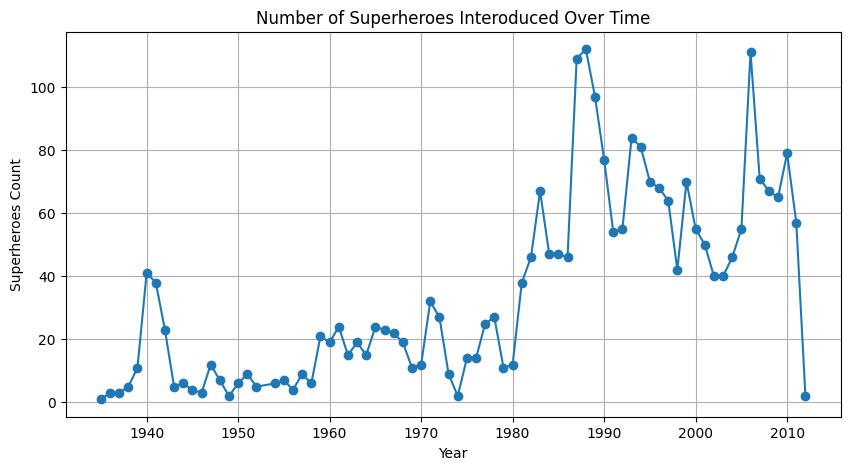

In [10]:
year_count = df['First Appearance Year'].value_counts().sort_index()

plt.figure(figsize = (10, 5))
plt.plot(year_count.index, year_count.values,
         marker = 'o', linestyle = '-')
plt.title('Number of Superheroes Interoduced Over Time')
plt.xlabel('Year')
plt.ylabel('Superheroes Count')
plt.grid(True)

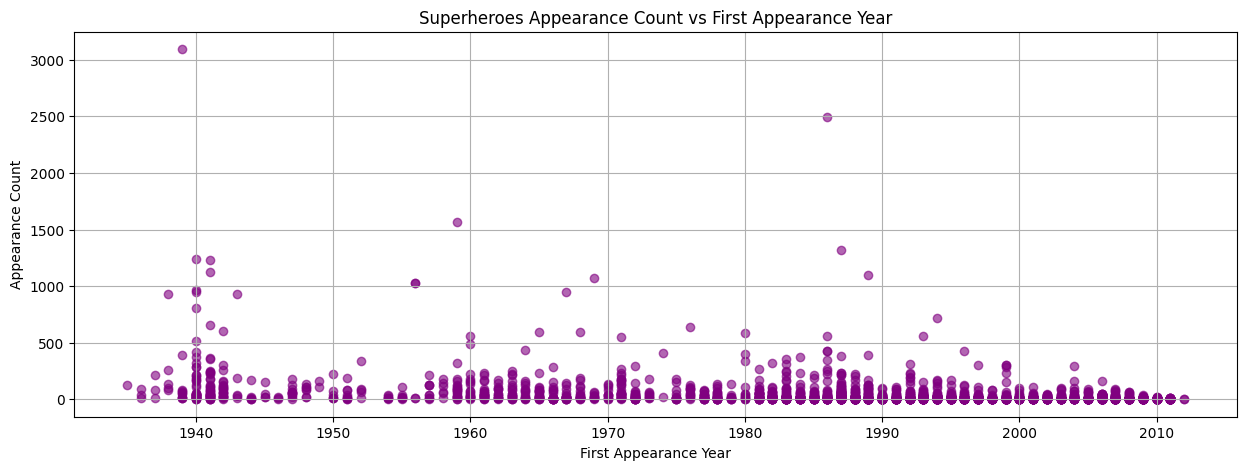

In [16]:
plt.figure(figsize = (15, 5))
plt.scatter(df['First Appearance Year'],
            df['Appearance Count'], alpha = 0.6,
            color = 'purple')
plt.title('Superheroes Appearance Count vs First Appearance Year')
plt.xlabel('First Appearance Year')
plt.ylabel('Appearance Count')
plt.grid(True)

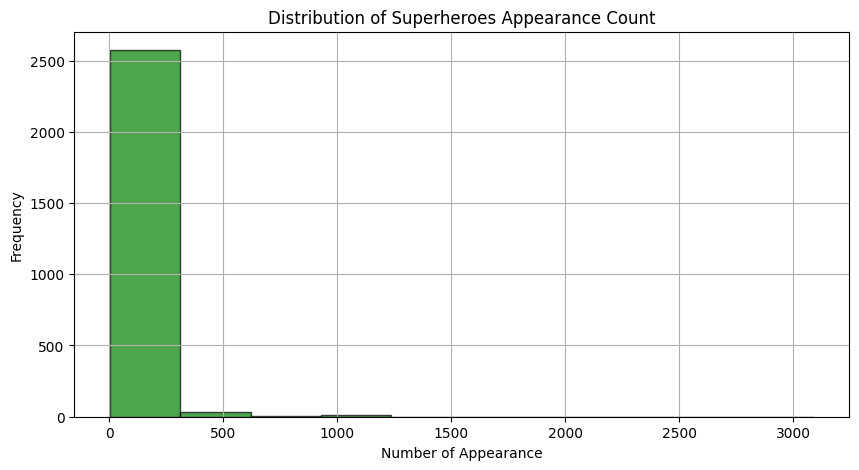

In [22]:
plt.figure(figsize = (10, 5))
plt.hist(df['Appearance Count'], bins = 10, color = 'green',
         edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of Superheroes Appearance Count')
plt.xlabel('Number of Appearance')
plt.ylabel('Frequency')
plt.grid(True)

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_6224\639082432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Eye Color'],


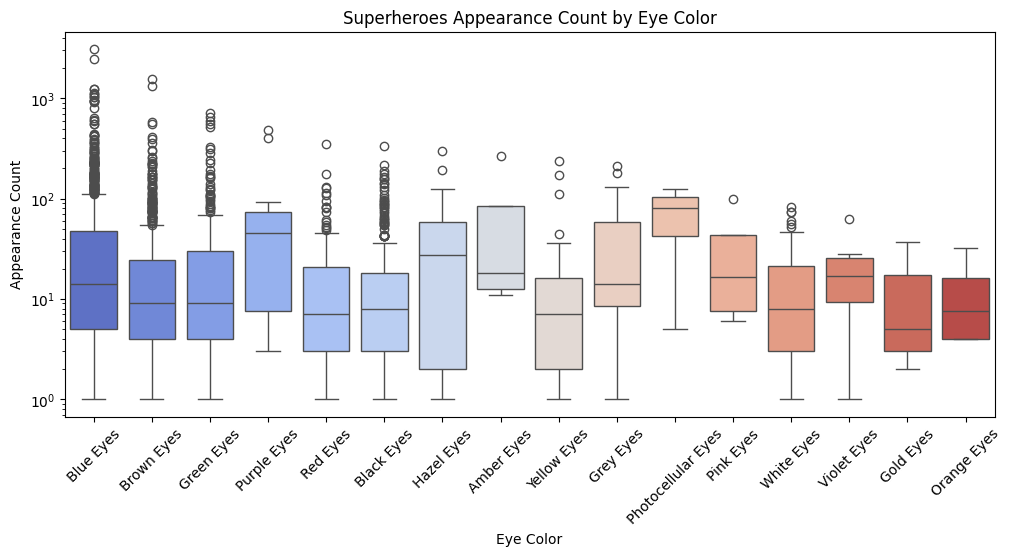

In [24]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = df['Eye Color'],
            y = df['Appearance Count'],
            palette = 'coolwarm')
plt.title('Superheroes Appearance Count by Eye Color')
plt.xlabel('Eye Color')
plt.ylabel('Appearance Count')
plt.xticks(rotation = 45)
plt.yscale('log')